# Fish Data Analysis: Linear Regression for Height vs. Weight


## 1. Problem Statement  
This project aims to explore the **relationship between the height and weight of fish**. The goal is to develop a **linear regression model** to predict fish weight based on height.  
Understanding this relationship can provide insights into fish growth patterns and can be useful for fisheries research and management.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## 2. Dataset Overview  

The data dictionary is below:

| **variable**      | **description**        |
|-------------------|------------------------|
| `species`         | Species name of fish   |
| `weight`          | Weight, in grams       |
| `length_vertical` | Vertical length, in cm |
| `length_diagonal` | Diagonal length, in cm |
| `length_cross`    | Cross length, in cm    |
| `height`          | Height, in cm          |
| `width`           | Diagonal width, in cm  |
    
The dataset may include other variables such as lengths and widths, but for this analysis, we are focusing on **height and weight**.


In [5]:
# Loading data
fish = pd.read_csv('data/fish.csv')
fish.head()


,species,weight,length_vertical,length_diagonal,length_cross,height,width
0,Bream,242,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430,26.5,29.0,34.0,12.4440,5.1340


## 3. Data Preprocessing  
Before building the model, we need to:
1. **Check for missing values**.
2. **Handle outliers** if necessary.
3. **Visualize the data distribution**.

Missing values:
 species            0
weight             0
length_vertical    0
length_diagonal    0
length_cross       0
height             0
width              0
dtype: int64


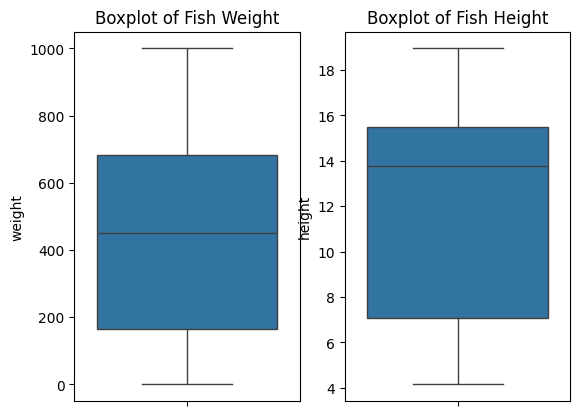

In [30]:
# Code Block: Check for Missing Values
print("Missing values:\n", fish.isnull().sum())

# Code Block: Summary Statistics
fish.describe()

fig,axs= plt.subplots(1,2)
# # Code Block: Visualize Outliers
sns.boxplot(fish['weight'], ax=axs[0])
axs[0].set_title('Boxplot of Fish Weight')
sns.boxplot(fish['height'], ax=axs[1])
axs[1].set_title('Boxplot of Fish Height')
plt.show()


## 4. Exploratory Data Analysis (EDA)  
We will explore the **relationship between height and weight** using visualizations:
- **Scatter plot** to visualize the correlation.
- **Correlation coefficient** to measure the strength of the relationship.

Correlation between Height and Weight:
           height    weight
height  1.000000  0.953797
weight  0.953797  1.000000


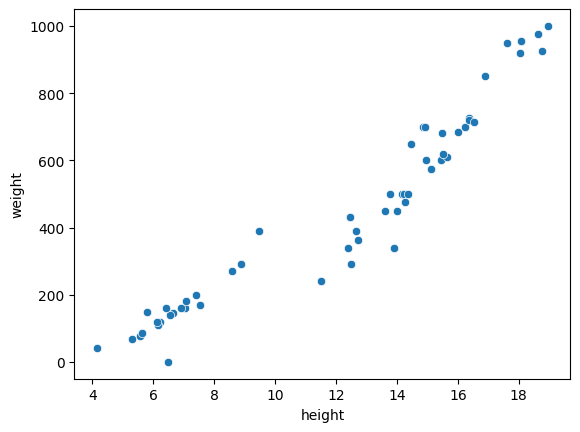

In [33]:
sns.scatterplot( data=fish, x='height',y='weight')

correlation = df[['height', 'weight']].corr()
print("Correlation between Height and Weight:\n", correlation)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


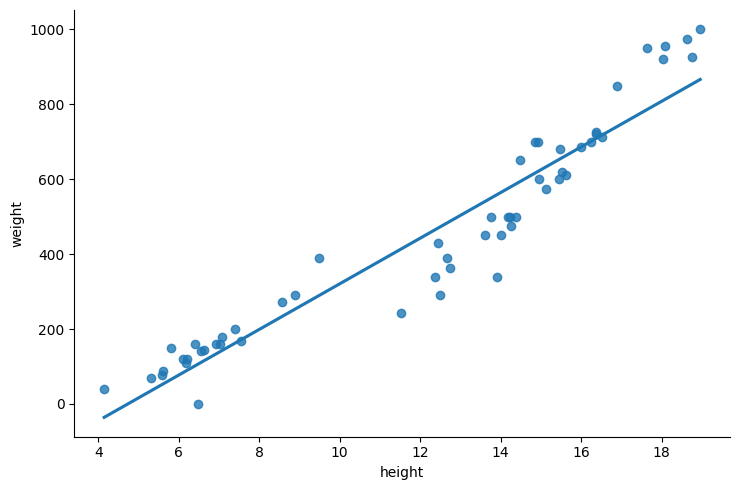

In [31]:
sns.lmplot( data=fish, x='height',y='weight', aspect=1.5, ci=None)

## 5. Model Building: Linear Regression  
We will split the dataset into **training and testing sets** and use a **linear regression model** to identify the relationship between height and weight.


In [36]:
# Code Block: Train-Test Split
X = fish[['height']]  # Independent variable
y = fish['weight']    # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [38]:
# Code Block: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)


Intercept: -268.4683074393767
Coefficient: [58.82866761]


## 6. Model Evaluation  
We will evaluate the performance of the model using:
- **R² (coefficient of determination)**: Measures how well the model explains the variability in weight.
- **Mean Squared Error (MSE)**: Measures the average squared difference between the actual and predicted values.


In [39]:
# Code Block: Model Prediction and Evaluation
y_pred = model.predict(X_test)

# Calculate R² and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)


R² Score: 0.8616462110108233
Mean Squared Error: 11245.235114808107


## 7. Visualizing the Regression Line  
We will plot the **regression line** to visualize how well it fits the data.


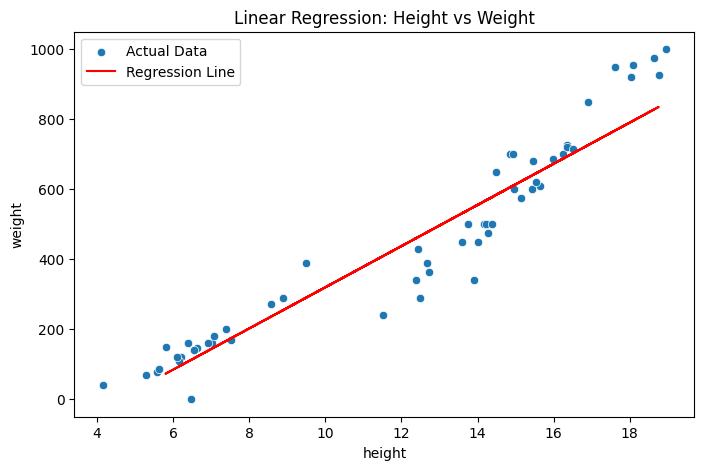

In [40]:
# Code Block: Plotting the Regression Line
plt.figure(figsize=(8, 5))
sns.scatterplot(x='height', y='weight', data=fish, label='Actual Data')

# Plot the regression line
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.title('Linear Regression: Height vs Weight')
plt.legend()
plt.show()


## 8. Conclusion  
The linear regression model provides insights into the relationship between fish height and weight.  
Key Takeaways:
- **R² Score**: Indicates the proportion of the variance in the dependent variable that the independent variable explains.
- **MSE**: Provides an idea of how accurate the model’s predictions are.

---

## 9. Next Steps  
- Consider using additional variables (like length or width) for a **multivariate regression model**.
- Investigate species-specific relationships to improve the predictive power.
